# Testing Tesseract-OCR capabilities

HTML(value='<h1>Raw inputs:</h1>')

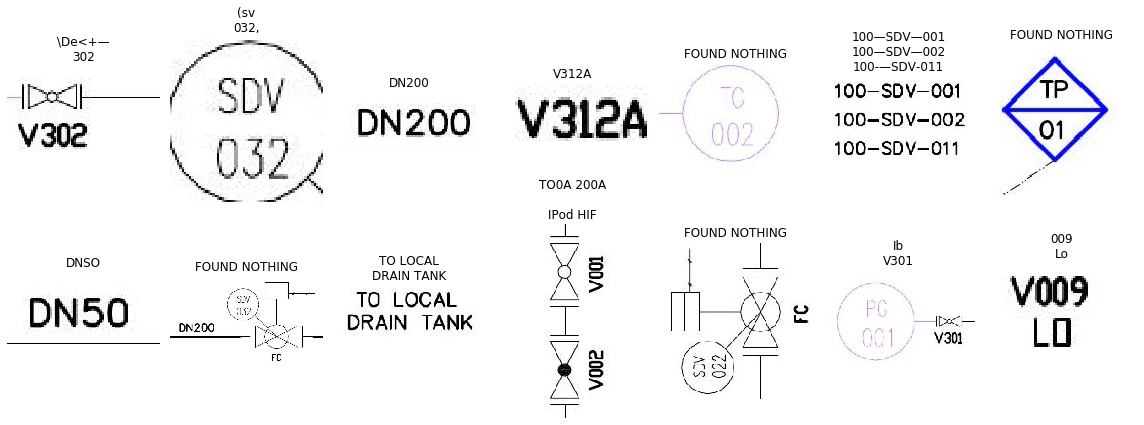

HTML(value='<h1>Grayscale inputs:</h1>')

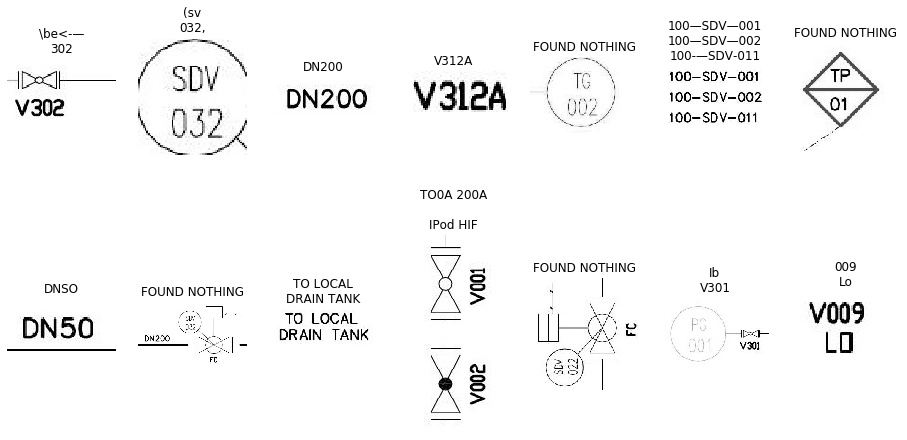

HTML(value='<h1>Threshold 100-255 inputs:</h1>')

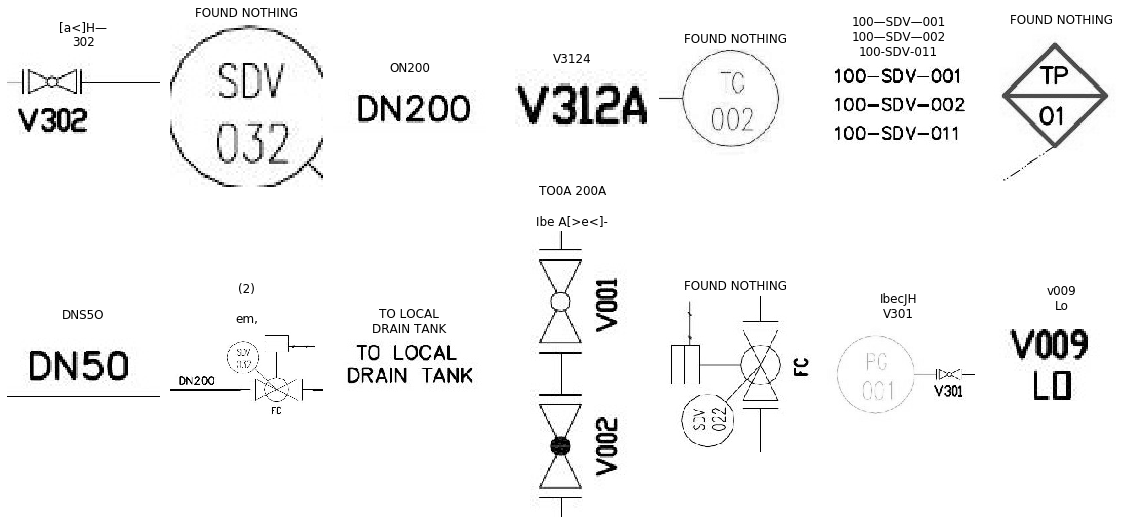

In [2]:
import os

import cv2 as cv
import numpy as np

import ipywidgets as widgets

import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\tesseract\tesseract.exe"

path = 'pdf2img_test/text_samples/'

files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]



desc =widgets.HTML(
    value="<h1>Raw inputs:</h1>",
)
display(desc)

fig = plt.figure(figsize=(16,6))

for idx, file_path in enumerate(files):
    img = cv.imread(file_path)
    recognized_text = pytesseract.image_to_string(img)
    if recognized_text =='':
        recognized_text = 'FOUND NOTHING'
    plt.subplot(2, int(len(files)/2), idx +1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(recognized_text)

plt.tight_layout()
plt.show()


desc =widgets.HTML(
    value="<h1>Grayscale inputs:</h1>",
)
display(desc)

plt.figure(figsize=(16,8))
for idx, file_path in enumerate(files):
    img = cv.imread(file_path, 0)
    recognized_text = pytesseract.image_to_string(img)
    if recognized_text =='':
        recognized_text = 'FOUND NOTHING'
    plt.subplot(2, int(len(files)/2), idx +1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(recognized_text)

plt.show()

desc =widgets.HTML(
    value="<h1>Threshold 100-255 inputs:</h1>",
)
display(desc)

plt.figure(figsize=(16,8))
for idx, file_path in enumerate(files):
    img = cv.imread(file_path, 0)
    _, thres = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
    recognized_text = pytesseract.image_to_string(thres)
    if recognized_text =='':
        recognized_text = 'FOUND NOTHING'
    plt.subplot(2, int(len(files)/2), idx +1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(recognized_text)

plt.tight_layout()
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

# Conclusions:

- OCR works well with text without any additional shapes in the image.
- OCR struggles against colored images
- thresholding can be helpful in some cases but main objection is to focus on clear input